1. Problem identification
2. Business Understanding
3. Collection Data
4. Pre_processing data
5. EDA (Exploratory Data Analysis)
6. Feature Engineering And selection
7. Model training , Evaluation ,selection  
8. Model Testing
  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# First Know our data Or Structures of the data

In [9]:
df.shape

(1338, 7)

**Conclusion:-**
- In our data, there are 7(including target(expenses) column) columns and 1338 rows.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Conclusions :-
- In our data, there are seven columns (age, sex, bmi, children, smoker, redion, expenses), and the data types of these columns are given above.
- Age, bmi, Children, expenses ---> Numerical columns
- sex, smoker, region ---> categorical columns

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Conclusion:-**
- There are no null values in our data.

In [18]:
df.describe()  # for the descriptive analysis of the dataset

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [20]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# EDA (Exploratory Data Analysis)

Correlation between the numerical columns

In [24]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


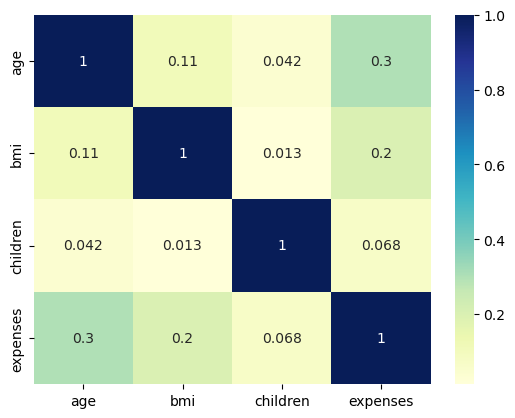

In [26]:
dataplot = sns.heatmap(df.iloc[:,[0,2,3,6]].corr(), cmap="YlGnBu", annot=True)

**Conclusion :-**
- Simply form the above table, and we say that the correlation coefficient between age and expenses is 0.3 and BMI vs. expenses is 0.2, which is high relative to others.

<Axes: ylabel='count'>

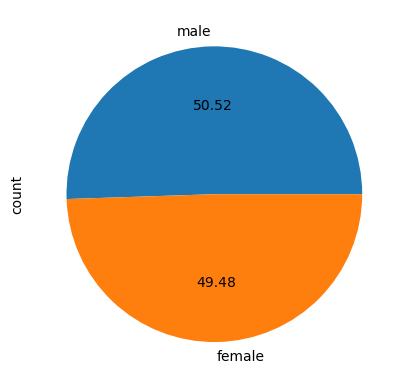

In [29]:
df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

**Conclusion :-**
- In our data, there are 50.52% males and 49.48% females.


<Axes: ylabel='count'>

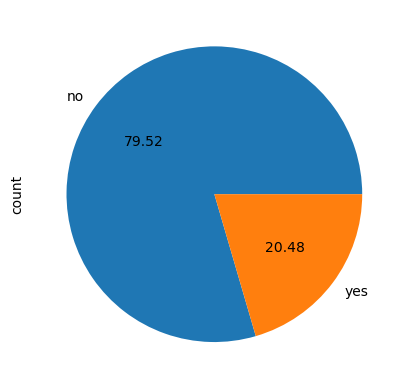

In [32]:
df['smoker'].value_counts(ascending=False).plot(kind = 'pie',autopct='%.2f')

**Conclusions:-**
- In our dataset, there are 79.52% of persons who are not smokers and 20.48% of persons who are smokers.

# Distribution of the features

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

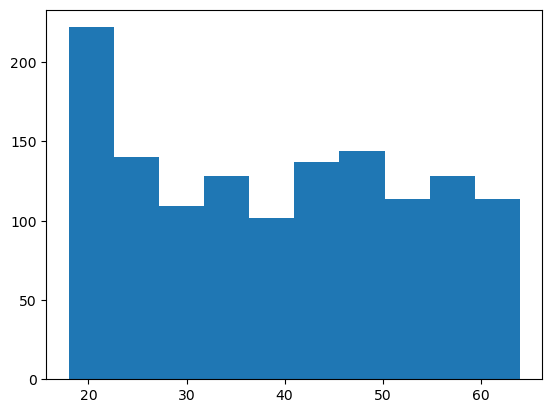

In [36]:
# histogram of age
df.age.mean()
import matplotlib.pyplot as plt
plt.hist(df["age"],bins = 10)

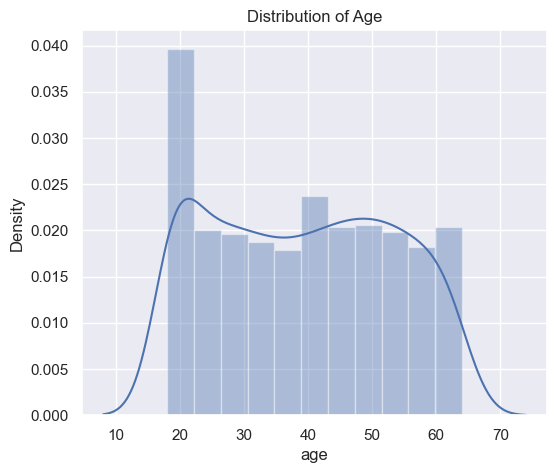

In [38]:

sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df["age"])
plt.title("Distribution of Age")
plt.show()

<Axes: ylabel='age'>

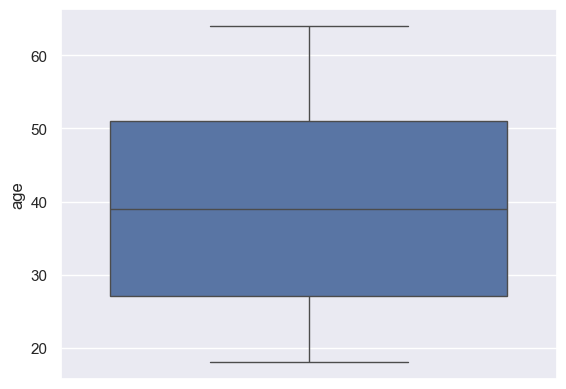

In [40]:
# Box-plot
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

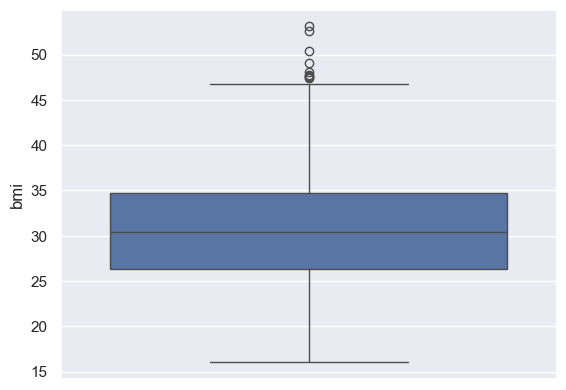

In [42]:
sns.boxplot(df['bmi'])

In [44]:
df[df['bmi'] > 47] # this is my outliers

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


<Axes: ylabel='children'>

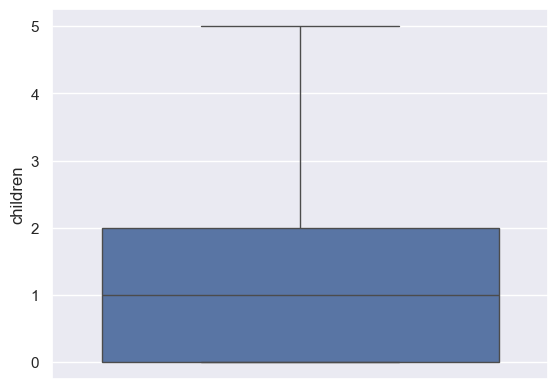

In [46]:
sns.boxplot(df['children'])

**Conclusion :-**
This boxplot graph show that
- There are no outlier in the Age column.
- There are some outlier in the bmi column.
- There are no outlier in the children column.

In [49]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

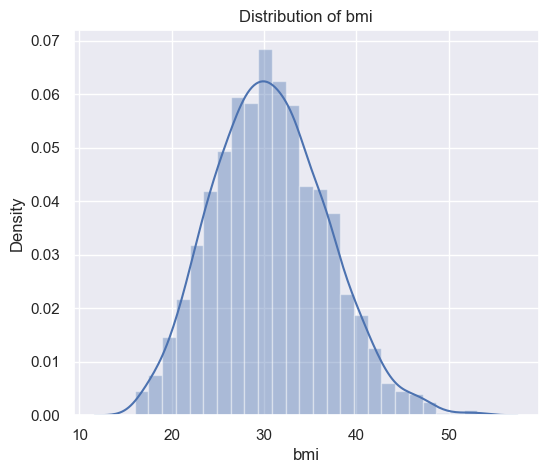

In [51]:
# for bmi
plt.figure(figsize = (6,5))
sns.distplot(df["bmi"])
plt.title("Distribution of bmi")
plt.show()

**Conclusion :-**
- The distribution of BMI is approximately normal

In [54]:
df['bmi'].skew()

0.28459296016731195

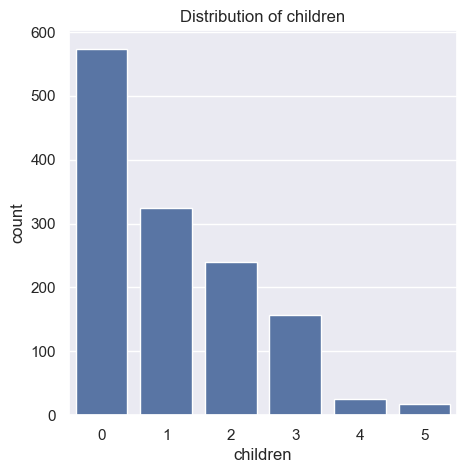

In [56]:
# for Children column
plt.figure(figsize = (5,5))
sns.countplot(x='children',data= df)

plt.title("Distribution of children")
plt.show()

In [58]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

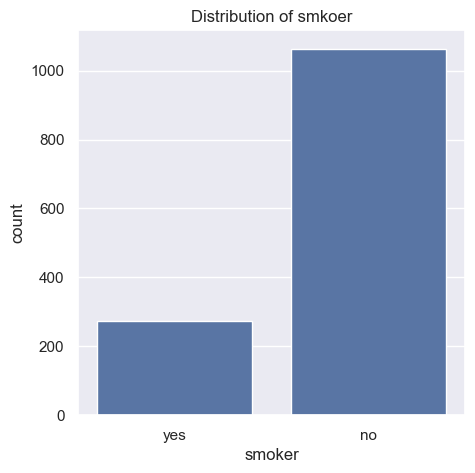

In [65]:
# for Children column
plt.figure(figsize = (5,5))
sns.countplot(x='smoker',data= df)

plt.title("Distribution of smkoer")
plt.show()

<Axes: xlabel='bmi', ylabel='age'>

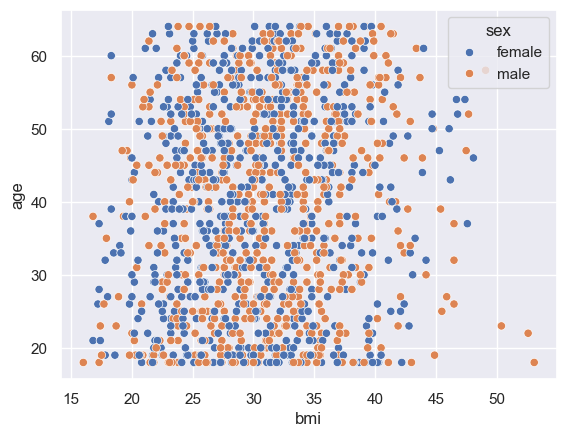

In [67]:
sns.scatterplot(x=df['bmi'],y=df['age'],hue=df['sex'])

In [69]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

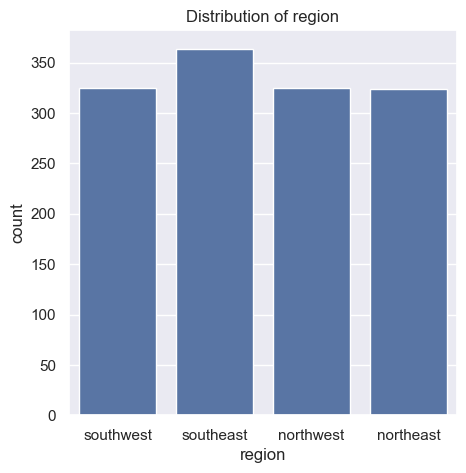

In [71]:
plt.figure(figsize = (5,5))
sns.countplot(x='region',data= df)

plt.title("Distribution of region")
plt.show()

In [73]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

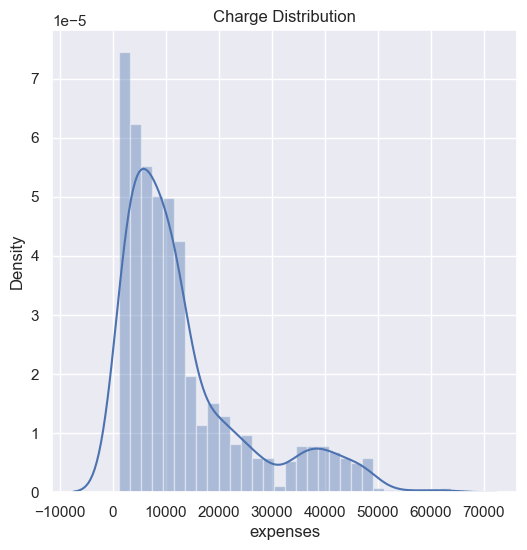

In [75]:

#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['expenses'])
plt.title('Charge Distribution')
plt.show()

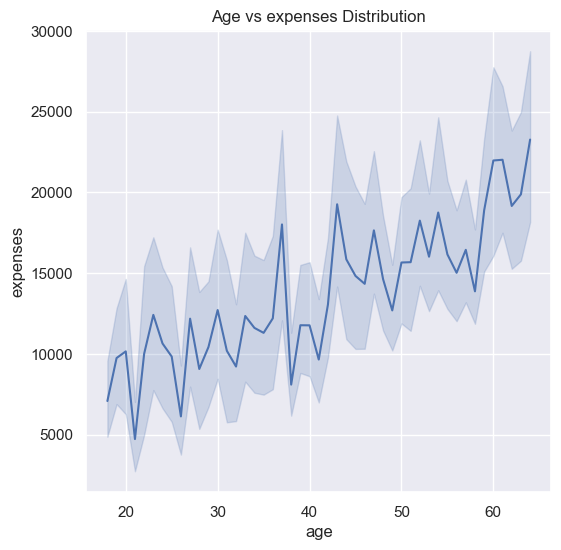

In [76]:
# Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='expenses',data= df)
plt.title('Age vs expenses Distribution')
plt.show()

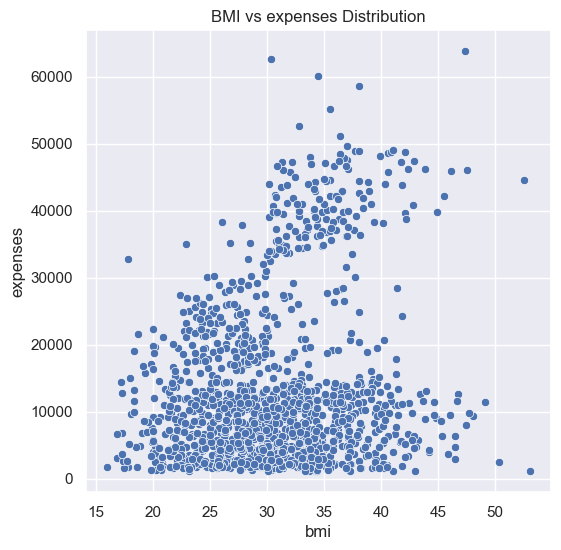

In [78]:
#Scatterplot for BMI and Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='expenses',data= df)
plt.title('BMI vs expenses Distribution')
plt.show()

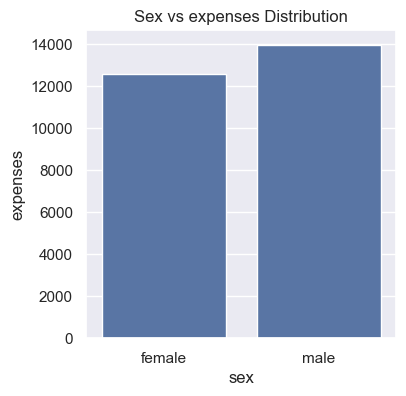

In [79]:
#Scatterplot for Sex and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='expenses',data= df , ci=None)
plt.title('Sex vs expenses Distribution')
plt.show()

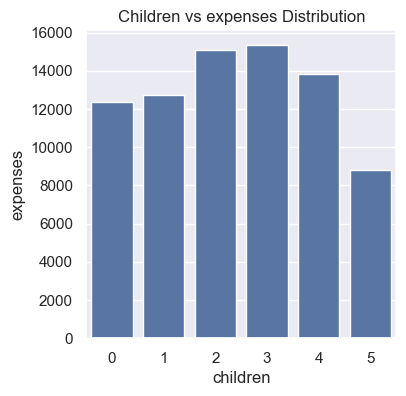

In [80]:
#Scatterplot for Children and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='expenses',data= df , ci=None)
plt.title('Children vs expenses Distribution')
plt.show()

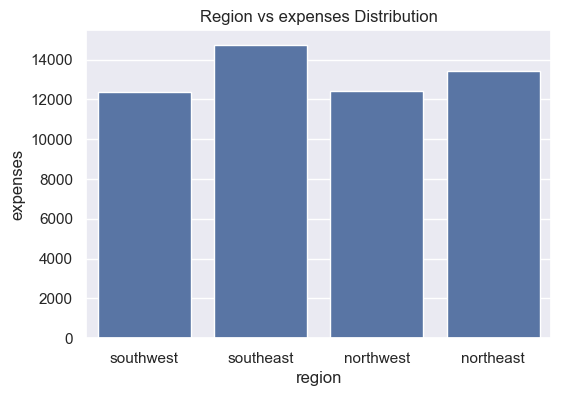

In [82]:
#Scatterplot for Region and Charges
plt.figure(figsize=(6,4))
sns.barplot(x='region',y='expenses',data= df , ci = None)
plt.title('Region vs expenses Distribution')
plt.show()

# Spliting the data into train dataset  and test dataset

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["expenses"]),df["expenses"],test_size = 0.2, random_state= 5)

In [89]:
X_train.shape , X_test.shape

((1070, 6), (268, 6))

# Feature Engineering

Encoding Categorical data into Numerical data

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [96]:
trf1 = ColumnTransformer([
    ("ohe_sex",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["sex"]),
    ("ohe_smoker",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["smoker"]),
    ("ohe_region",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["region"])
], remainder='passthrough')

In [98]:
trf2 = LinearRegression()

In [100]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(trf1, trf2)

In [102]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [104]:
predict_lr = pipe.predict(X_test)

In [106]:
# Lasso / L2
from sklearn.linear_model import Lasso
pipe2 = make_pipeline(
    trf1,        
    Lasso(alpha=10)  
)

In [108]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('lasso', Lasso(alpha=10))])

In [110]:
predict_lasso = pipe2.predict(X_test)

In [112]:
# Ridge/L2
from sklearn.linear_model import Ridge
pipe3 = make_pipeline(
    trf1,        
    Ridge(alpha=0.1)  
)


In [114]:
pipe3.fit(X_train, y_train)
predict_ridge = pipe3.predict(X_test)

In [116]:
r2_lr = r2_score(y_test, predict_lr)
r2_las = r2_score(y_test, predict_lasso)
r2_ridge = r2_score(y_test, predict_ridge)

In [118]:
performance_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R2 Score": [r2_lr, r2_las, r2_ridge]
})

In [120]:
performance_df = performance_df.sort_values(by="R2 Score", ascending=False)

In [122]:
performance_df

,Model,R2 Score
1,Lasso Regression,0.778167
0,Linear Regression,0.778128
2,Ridge Regression,0.778115


In [124]:
x_t = trf1.fit_transform(X_train,y_train)

In [126]:
n = df.shape[0]
k = x_t.shape[1]
def adjusted_r2(r2,n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [128]:
performance_df["Adjusted_r2"] = 1 - (1 - performance_df['R2 Score'])*(n - 1)/(n - k - 1)

In [130]:
performance_df.sort_values(by="Adjusted_r2", ascending=False)


,Model,R2 Score,Adjusted_r2
1,Lasso Regression,0.778167,0.776327
0,Linear Regression,0.778128,0.776288
2,Ridge Regression,0.778115,0.776274


# Testing phase

In [134]:
input_data = [
    [19, "female", 27.9, 0, "yes", "southwest"]
]
input_df = pd.DataFrame(input_data, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])


output = 16884.92

In [136]:
print("Prediction from Linear Rigression:", pipe.predict(input_df))
print("Prediction from Lasso Rigression:", pipe2.predict(input_df))
print("Prediction from Ridge:", pipe3.predict(input_df))

Prediction from Linear Rigression: [25124.5514274]
Prediction from Lasso Rigression: [25100.54231714]
Prediction from Ridge: [25119.09956771]
